In [2]:
import os
import cv2
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model
from sklearn.utils import shuffle
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    confusion_matrix,
    classification_report
)

In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [4]:
# Load model
model = load_model('models/mobilenetv2/mobilenetv2.h5')

In [5]:
# Class names
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
test_dir = 'dataset/test'

IMG_SIZE = 224

# Function to create test data
def create_test_data(folder_path):
    # Pre-allocate memory for the arrays
    num_images = sum([len(files) for r, d, files in os.walk(folder_path)])
    images = np.zeros((num_images, IMG_SIZE, IMG_SIZE, 3), dtype=np.float32)  # For mobilenetv2 RGB
    labels = np.zeros(num_images, dtype=np.int32)  # Pre-allocate

    index = 0
    for idx, class_name in enumerate(class_names):
        path = os.path.join(folder_path, class_name)
        for image_file in os.listdir(path):
            image = cv2.imread(os.path.join(path, image_file), cv2.IMREAD_GRAYSCALE)
            image_resized = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            # Normalize the image
            image_resized = image_resized / 255.0 
            
            # Assign to pre-allocated arrays
            images[index] = np.expand_dims(image_resized, axis=-1)  # Add channel dimension
            labels[index] = idx
            index += 1

    return images, labels

In [6]:
# Load test data
X_test, y_test = create_test_data(test_dir)

# Shuffle the data
X_test, y_test = shuffle(X_test, y_test)

# Shape of the data
print(X_test.shape)
print(y_test.shape)


(7178, 224, 224, 3)
(7178,)


In [ ]:
# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

Accuracy: 0.41543605461131233

              precision    recall  f1-score   support

       angry       0.23      0.78      0.36       958
     disgust       0.00      0.00      0.00       111
        fear       0.40      0.17      0.24      1024
       happy       0.88      0.47      0.61      1774
     neutral       0.49      0.28      0.36      1233
         sad       0.46      0.21      0.29      1247
    surprise       0.48      0.75      0.58       831

    accuracy                           0.42      7178
   macro avg       0.42      0.38      0.35      7178
weighted avg       0.52      0.42      0.41      7178



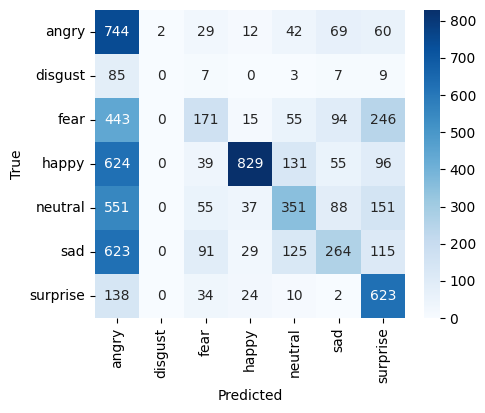

In [10]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy}\n')

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred_classes, target_names=class_names)
print(report)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
#plt.title('Confusion Matrix')
plt.show()

In [11]:
import pandas as pd

# Convert confusion matrix to DataFrame
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# Display the DataFrame
print(cm_df)

          angry  disgust  fear  happy  neutral  sad  surprise
angry       744        2    29     12       42   69        60
disgust      85        0     7      0        3    7         9
fear        443        0   171     15       55   94       246
happy       624        0    39    829      131   55        96
neutral     551        0    55     37      351   88       151
sad         623        0    91     29      125  264       115
surprise    138        0    34     24       10    2       623


In [17]:
# Calculate precision, recall, and F1-score for the whole test set
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_test, y_pred_classes)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')

Precision: 0.5553249561331832
Recall: 0.38144329896907214
F1 Score: 0.38397769042585916
Accuracy: 0.38144329896907214


In [24]:
# Load the training history
history = np.load('models/fer_mobilenetv2_history.npz', allow_pickle=True)['arr_0'].item()

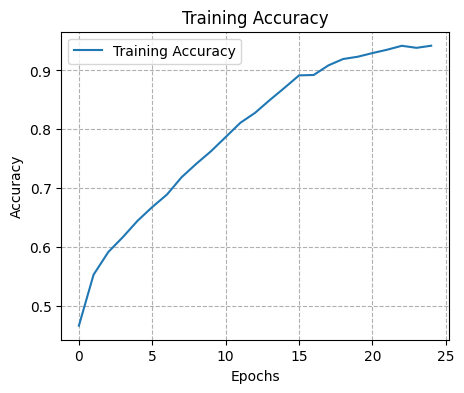

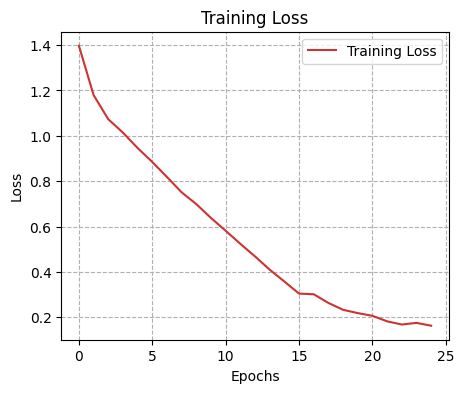

In [33]:
# Extract accuracy and loss
accuracy = history['accuracy']
loss = history['loss']

# Plot accuracy
plt.figure(figsize=(5, 4))
plt.plot(accuracy, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.grid('minor', linestyle='--')
plt.legend()

plt.figure(figsize=(5, 4))
plt.plot(loss, label='Training Loss', color=(0.8, 0.2, 0.2))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid('minor', linestyle='--')
plt.legend()

plt.show()